In [2]:
# Importing the required libraries

# Libraries to explore the data
import os
import pandas as pd
import numpy as np

# Libraries to visualise the data
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the data into a DataFrame
df = pd.read_csv("cleaned_star_data.csv")

# View first three rows in the DataFrame
df.head(3)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.0024,0.1700,16.12,0,Red,M
1,3042,0.0005,0.1542,16.60,0,Red,M
2,2600,0.0003,0.1020,18.70,0,Red,M


In [4]:
# View 10 random samples in the DataFrame
df.sample(10)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
202,14982,0.001180,0.0113,12.230,2,Blue,B
102,23000,127000.000000,36.0000,-5.760,4,Blue,O
234,21904,748490.000000,1130.0000,-7.670,5,Blue-White,B
95,11250,672.000000,6.9800,-2.300,3,Blue-White,A
235,38940,374830.000000,1356.0000,-9.930,5,Blue,O
201,15680,0.001220,0.0114,11.920,2,Blue,B
218,17140,883.000000,5.6530,-2.640,3,Blue-White,B
14,2650,0.000600,0.1400,11.782,1,Red,M
43,3200,195000.000000,17.0000,-7.220,4,Red,M
129,2731,0.000437,0.0856,18.090,0,Red,M


In [5]:
# Check general information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


### Observations

**1)** Dataset consists of 240 rows, 6 feature and 1 target columns,

- _Absolute Temperature (in K)_
- _Relative Luminosity (L/Lo)_
- _Relative Radius (R/Ro)_
- _Absolute Magnitude (Mv)_
- _Star Color_
- _Spectral Class_
- _Star Type (Target classes)_

**Note:**

- We want to classify the star type based on the other six properties.
- _Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun)_
- _Ro = 6.9551 x 10^8 m (Avg Radius of Sun)_

**2)** Two categorical features (object type) which will need some kind of encoding,

- _Star Color_
- _Spectral Class_

**3)** It consists of some different features of stars. Information on the star type is given below,

- **0** → Brown Dwarf
- **1** → Red Dwarf
- **2** → White Dwarf
- **3** → Main Sequence
- **4** → Supergiants
- **5** → Hypergiants


In [40]:
# Create a directory to save the visualizations
folder_name = 'star_plots'
os.makedirs(folder_name, exist_ok=True)

# Get the path of the directory
base_dir = f"/Users/so/GitProjects/PortfolioProjects/Data-Projects/astronomical-analysis/{
    folder_name}/"

### Visualize the count of stars for each type of a star


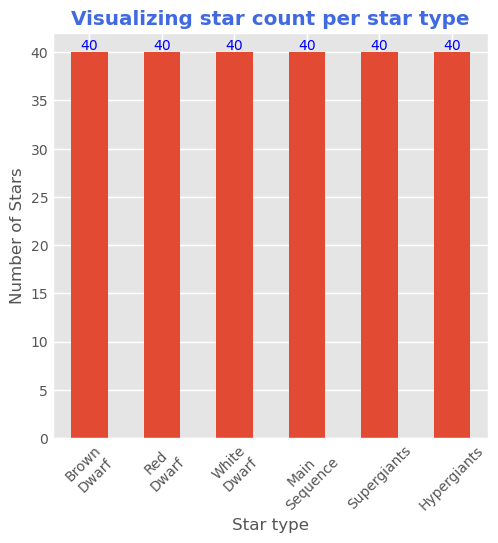

In [53]:
# Bar chart to visualize count of stars with respective type using matplolib

# Adjust size of plot
plt.figure(figsize=(5, 5))

# Set  background colour of graph
plt.style.use('ggplot')

# Plot bar graph
ax = df['Star type'].value_counts().plot(kind='bar')

# Add count labels to bar
ax.bar_label(ax.containers[0], color='blue')

# Add title to plot
plt.title('Visualizing star count per star type',
          color='royalblue', weight='bold')

# Add ylabel
plt.ylabel('Number of Stars', fontsize=12)

# Change xticks labels
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['Brown\nDwarf', 'Red\nDwarf',
           'White\nDwarf', 'Main\nSequence', 'Supergiants', 'Hypergiants'], rotation=45)

# Save plot
plt.savefig(base_dir+'barplot_star_count.png')

# Show graph
plt.show()

### Create seaborn barplot to compare it with the above bar chart


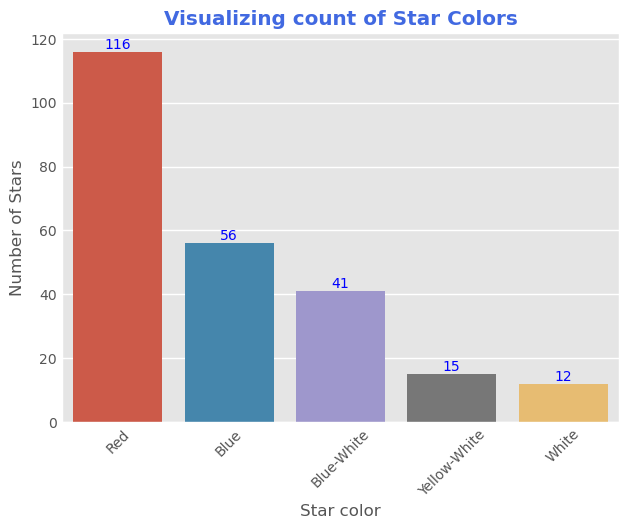

In [58]:
# Visualize the Star color data
ax = sns.barplot(x=df['Star color'].value_counts().index,
                 y=df['Star color'].value_counts())

# Add count labels to bar
ax.bar_label(ax.containers[0], color='blue')

# Add title to plot
plt.title('Visualizing count of Star Colors',
          color='royalblue', weight='bold')

# Add ylabel
plt.ylabel('Number of Stars', fontsize=12)

# Change xticks labels
plt.xticks(rotation=45)

# Save plot
plt.savefig(base_dir+'barplot_star_color_count.png')

# Show plot
plt.show()

### Visualize outliers if any with boxplots


In [60]:
# View first 5 rows of the data
df.head(5)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


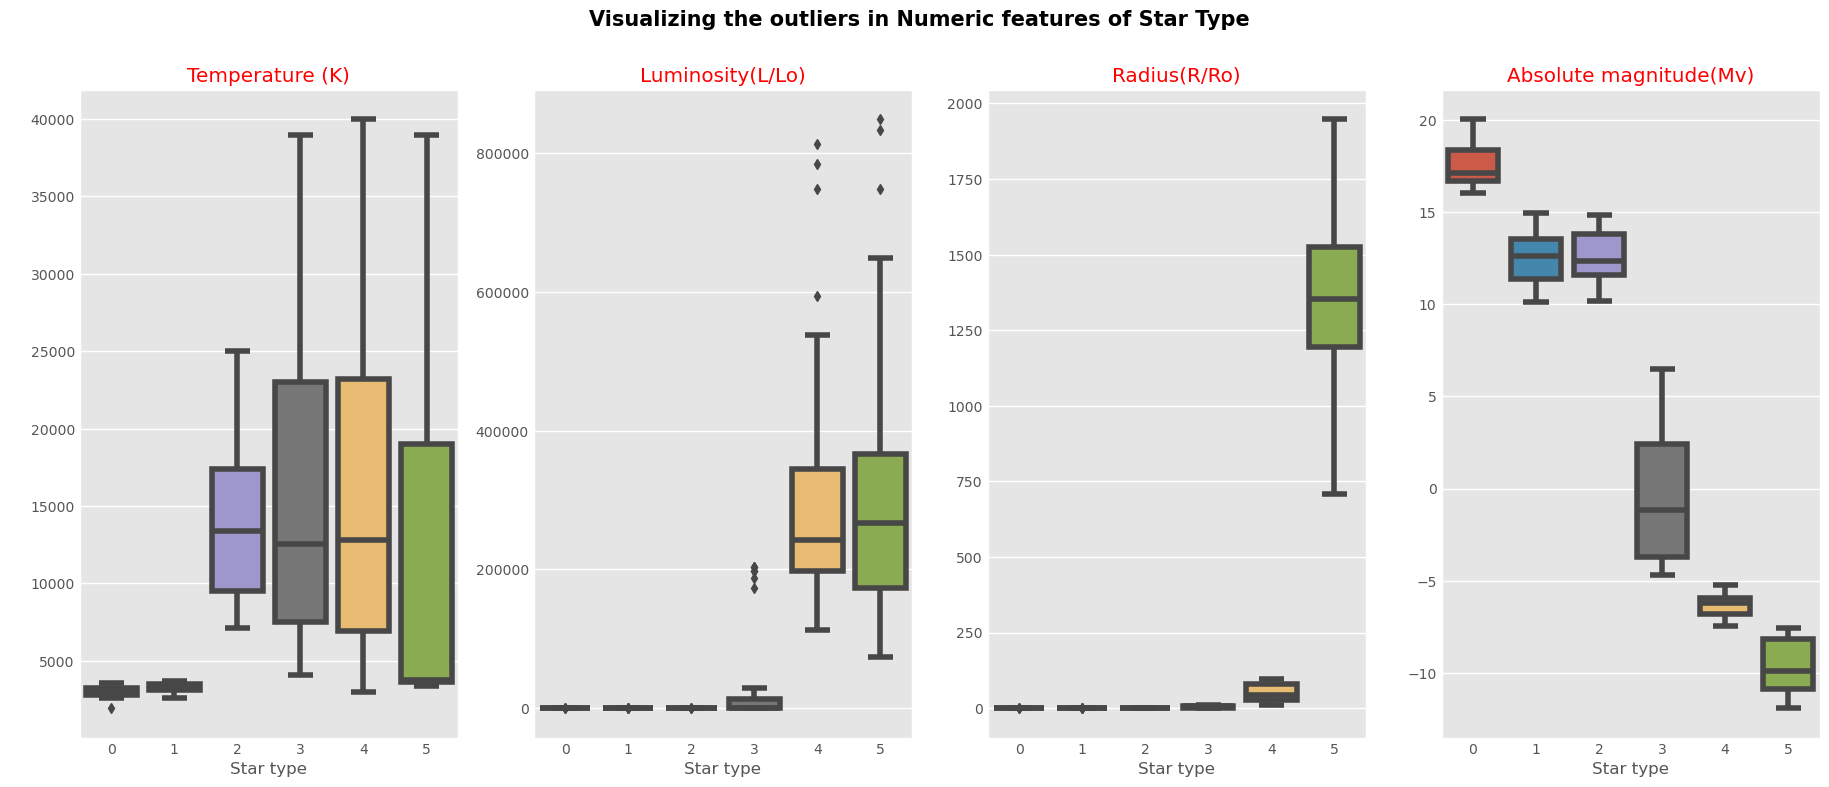

In [74]:
# Visualize outliers in the data using subplot of the numerical features

# Set plot size
plt.figure(figsize=(20, 8))

# Set background style
plt.style.use('ggplot')

# Set subplot title
plt.suptitle('Visualizing the outliers in Numeric features of Star Type',
             weight='bold', fontsize=15)

for i in range(4):
    plt.subplot(1, 4, i+1)
    sns.boxplot(x=df['Star type'], y=df.iloc[:, i])

    # Add titles
    plt.title(df.columns[i], color='red')

    # Remove ylabels
    plt.ylabel(' ')

# Save plot
plt.savefig(base_dir+'boxplot_star_type.png')

plt.show()

### Create lineplots to view statistical distribution of numeric features


In [81]:
# Define function that creates subplot of line plots
def line_subplot(df, colors, i):
    """
    This will create subplot within for loop

    Parameters
    ----------
    - df: data frame
    - colors: colors to display on plot
    - i: index of the iteration

    Generates
    ------
    - subplot on all axes with respective plots and titles
    """
    plt.subplot(4, 1, i+1)
    plt.plot(df.iloc[:, i], color=colors[i])
    plt.title(df.columns[i], color='red')

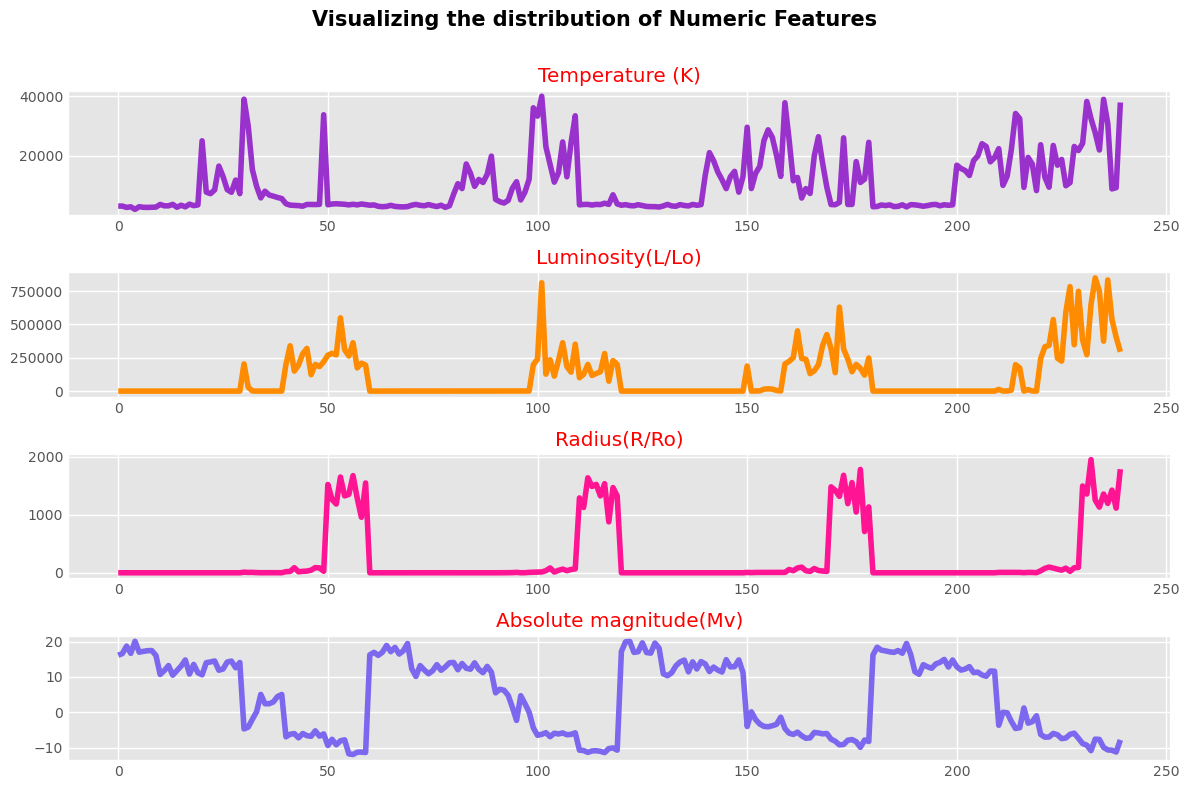

In [96]:
# Line Plots

# Colors to add in line plots
colors = ['darkorchid', 'darkorange', 'deeppink', 'mediumslateblue']

# Add figure size and title to subplot
plt.figure(figsize=(12, 8))
plt.suptitle('Visualizing the distribution of Numeric Features\n',
             color='black', fontsize=15, weight='bold')

# Use for loop and the function that creates subplot of line plots
for i in range(4):
    line_subplot(df, colors, i)

# Use tight_layout() to automatically adjust the spacing in subplot
plt.tight_layout()

# Save the figure
plt.savefig(base_dir+'line_subplot.png')
plt.show()

### Create pairplots


/Users/so/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


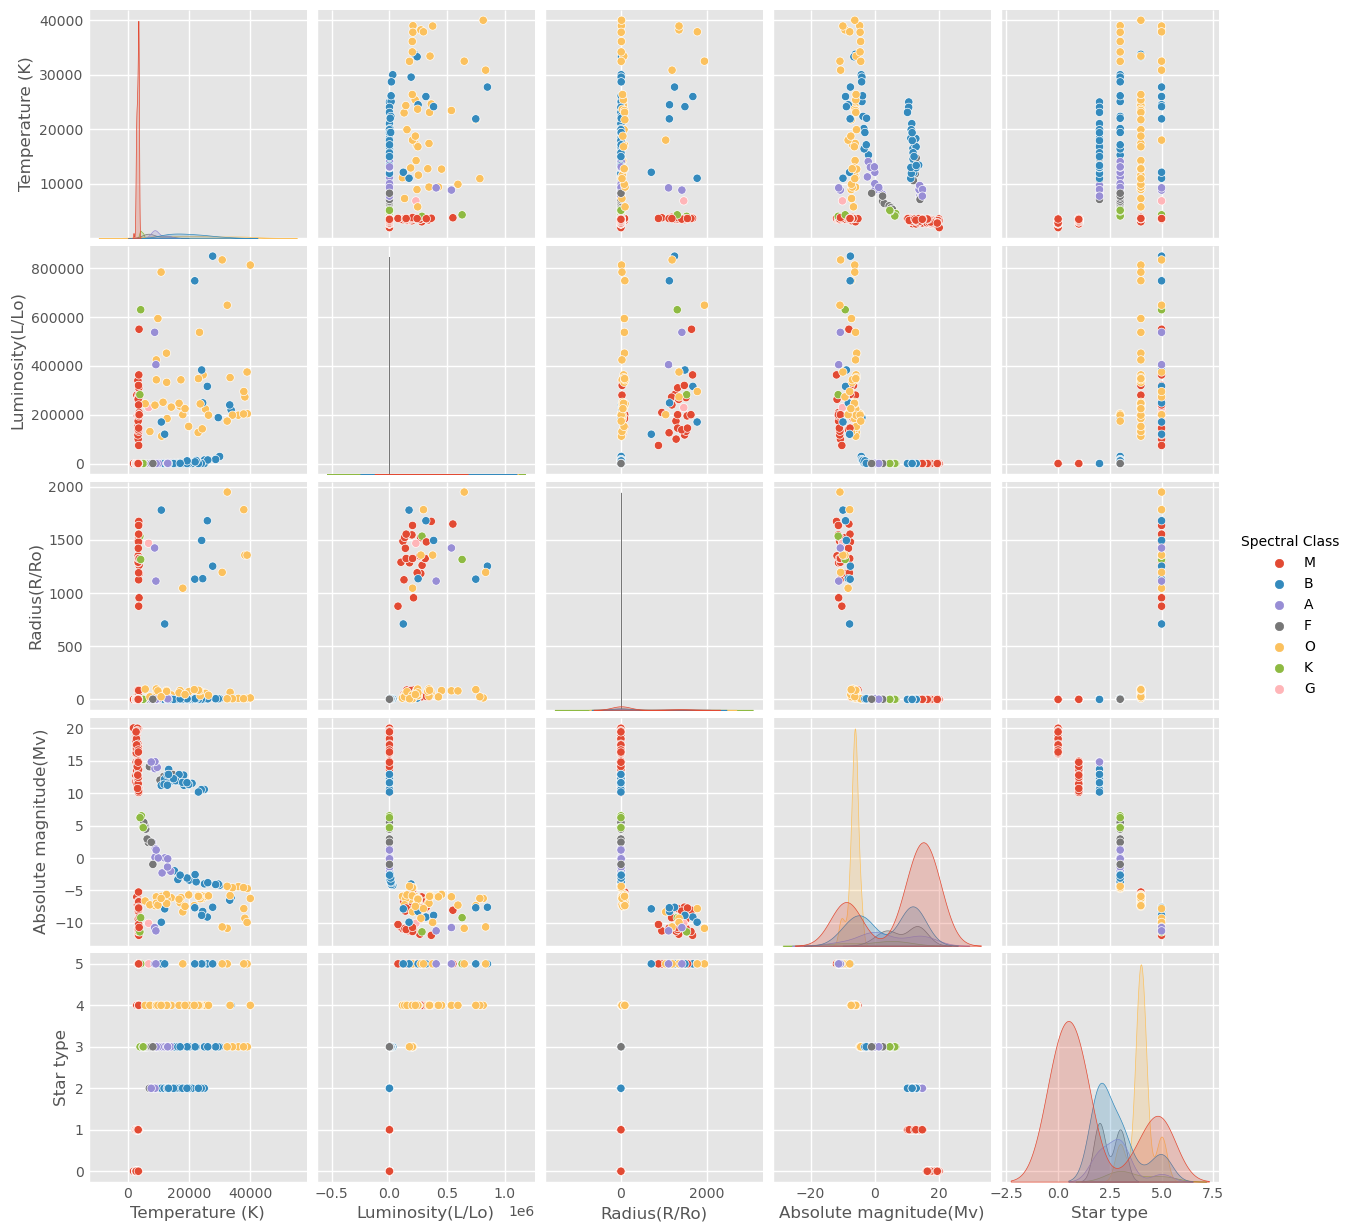

In [98]:
# Set background style
plt.style.use('ggplot')

# Create pairplots in form of scatter plots
sns.pairplot(df, hue='Spectral Class')

# Save the figure
plt.savefig(base_dir+'pairplot.png')
plt.show()